___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
# Summary statistics of numerical columns
print(data.describe())


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [4]:
# Data types and missing values information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
# Unique values in categorical columns
print(data['Geography'].unique())
print(data['Gender'].unique())


['France' 'Spain' 'Germany']
['Female' 'Male']


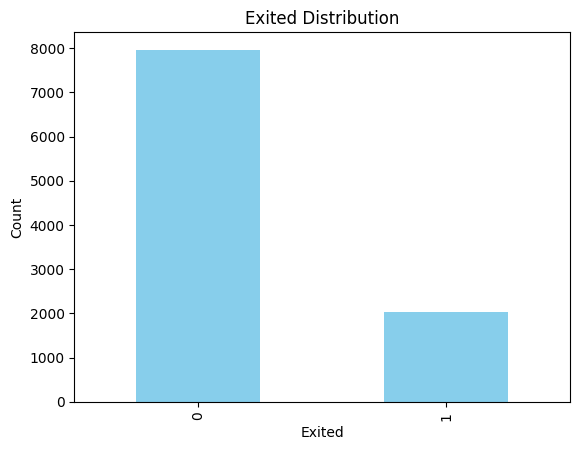

In [8]:
# Bar plot of the target variable (Exited)

data['Exited'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Exited Distribution')
plt.show()


# Check missing value

In [10]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)



Missing values in the dataset:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_features = data.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))]

# Print the VIF values
print("VIF Values:")
print(vif_data)

# Select features with VIF less than a certain threshold (for example, 10)
selected_features = vif_data[vif_data['VIF'] < 17]['feature']

# Updated dataset with selected features
selected_data = data[selected_features]

# Print selected features
print("Selected Features:")
print(selected_features)

VIF Values:
            feature        VIF
0         RowNumber   4.002844
1        CustomerId  83.184609
2       CreditScore  46.347812
3               Age  16.405859
4            Tenure   4.011030
5           Balance   2.793324
6     NumOfProducts   8.742618
7         HasCrCard   3.398460
8    IsActiveMember   2.158265
9   EstimatedSalary   4.034073
10           Exited   1.438506
Selected Features:
0           RowNumber
3                 Age
4              Tenure
5             Balance
6       NumOfProducts
7           HasCrCard
8      IsActiveMember
9     EstimatedSalary
10             Exited
Name: feature, dtype: object


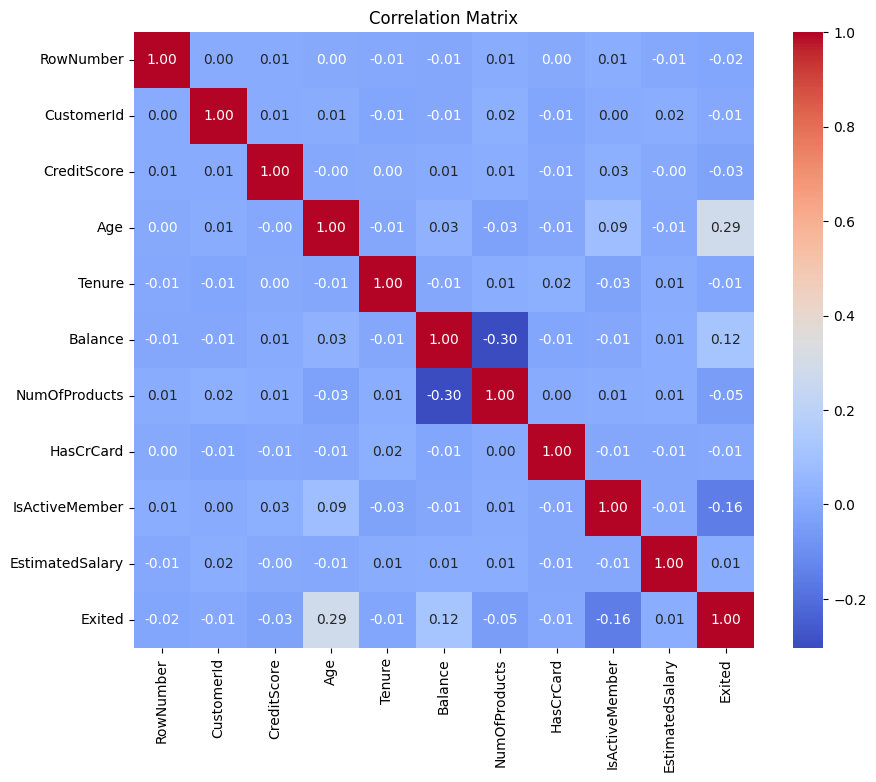

In [24]:
# Select numerical columns only
numerical_columns = data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [30]:
print(data.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')


### The Chi-squared test results for the relationship between the 'Gender_Male' column and the 'Exited' column indicate a statistically significant association. The Chi-squared statistic value is \(112.92\), and the corresponding p-value is approximately \(2.25 \times 10^{-26}\), which is significantly smaller than the typical alpha level of \(0.05\). This suggests strong evidence to reject the null hypothesis, indicating that there is a significant relationship between gender and customer churn in the dataset. it means that gender (specifically, being male) is likely to have an impact on whether a customer will leave the bank or not, based on the provided dataset.

Chi-squared test for Geography_Germany:
Chi2 Statistic: 299.9876230864172
P-value: 3.314880547229897e-67



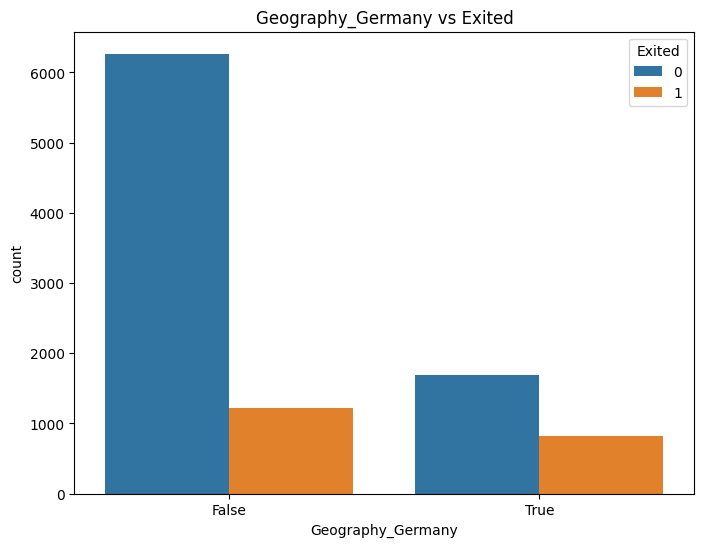

Chi-squared test for Geography_Spain:
Chi2 Statistic: 27.43577401125696
P-value: 1.6239910333565777e-07



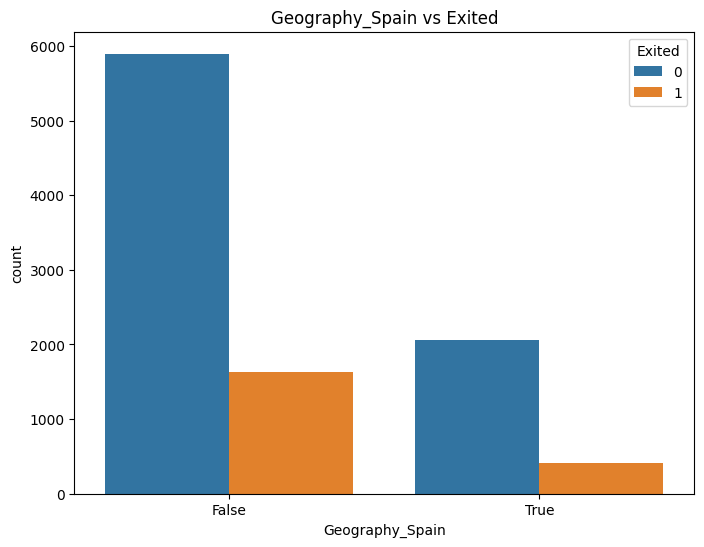

Chi-squared test for Gender_Male:
Chi2 Statistic: 112.91857062096116
P-value: 2.2482100097131755e-26



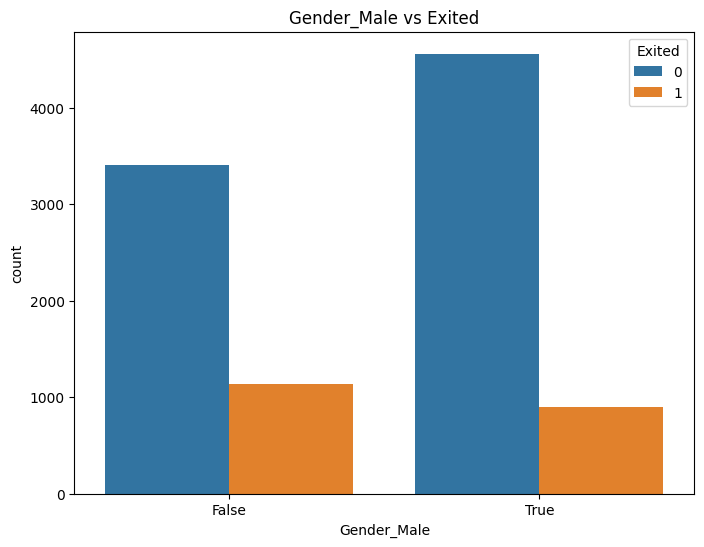

In [29]:

from scipy.stats import chi2_contingency

target_column = 'Exited'

categorical_columns = ['Geography_Germany', 'Geography_Spain', 'Gender_Male']

# Perform Chi-squared test and visualization
for cat_column in categorical_columns:
    contingency_table = pd.crosstab(data[cat_column], data[target_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-squared test for {cat_column}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_column, hue=target_column, data=data)
    plt.title(f'{cat_column} vs {target_column}')
    plt.show()


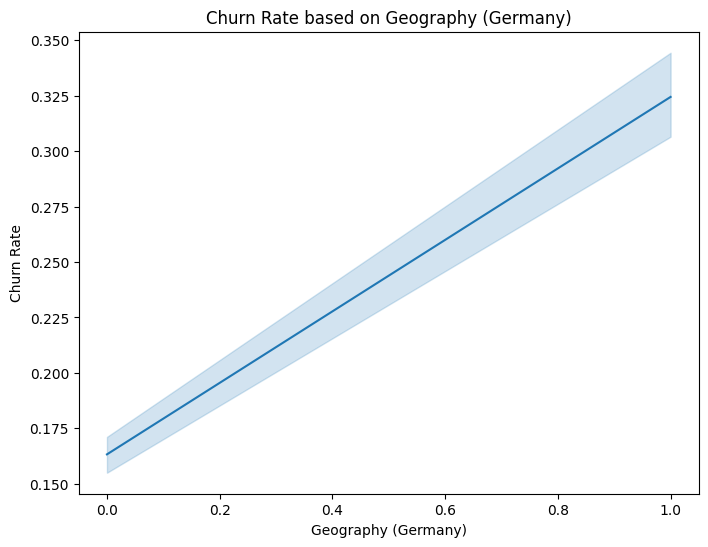

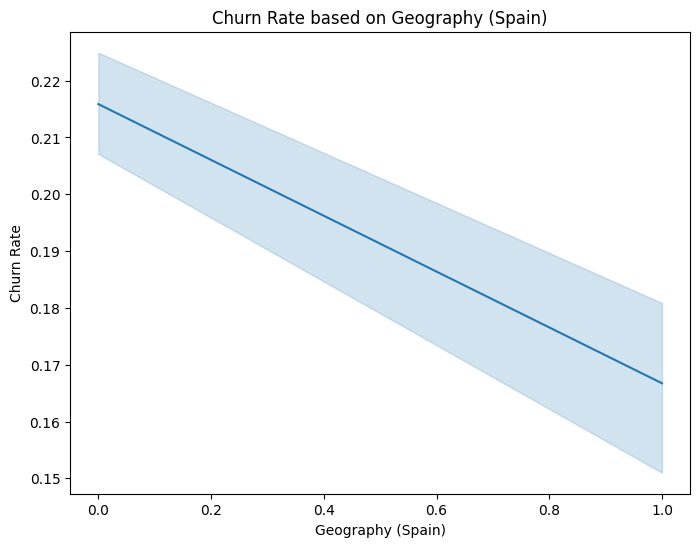

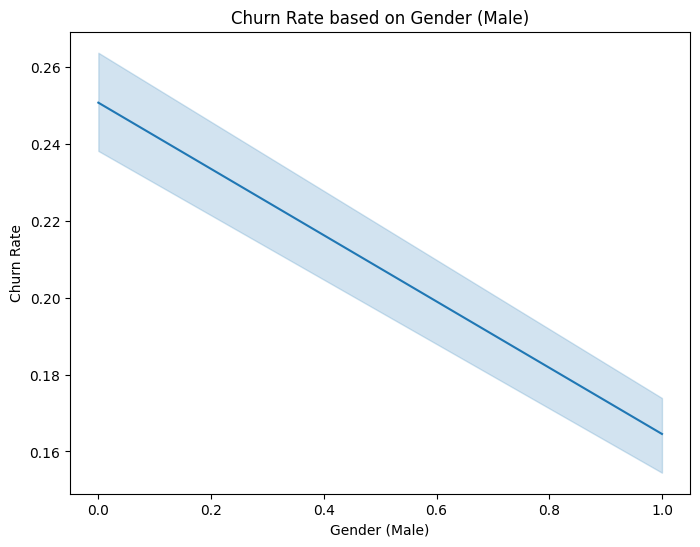

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Linear plot for Geography_Germany
plt.figure(figsize=(8, 6))
sns.lineplot(x='Geography_Germany', y='Exited', data=data)
plt.title('Churn Rate based on Geography (Germany)')
plt.xlabel('Geography (Germany)')
plt.ylabel('Churn Rate')
plt.show()

# Linear plot for Geography_Spain
plt.figure(figsize=(8, 6))
sns.lineplot(x='Geography_Spain', y='Exited', data=data)
plt.title('Churn Rate based on Geography (Spain)')
plt.xlabel('Geography (Spain)')
plt.ylabel('Churn Rate')
plt.show()

# Linear plot for Gender_Male
plt.figure(figsize=(8, 6))
sns.lineplot(x='Gender_Male', y='Exited', data=data)
plt.title('Churn Rate based on Gender (Male)')
plt.xlabel('Gender (Male)')
plt.ylabel('Churn Rate')
plt.show()


In [42]:
data = data.drop(columns=['Surname'])


In [45]:
data['Geography_Germany'] = data['Geography_Germany'].astype(int)
data['Geography_Spain'] = data['Geography_Spain'].astype(int)
data['Gender_Male'] = data['Gender_Male'].astype(int)


In [49]:
data.head(5)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_features = data.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))]

# Print the VIF values
print("VIF Values:")
print(vif_data)

# Select features with VIF less than a certain threshold (for example, 10)
selected_features = vif_data[vif_data['VIF'] < 17]['feature']

# Updated dataset with selected features
selected_data = data[selected_features]

# Print selected features
print("Selected Features:")
print(selected_features)

VIF Values:
              feature        VIF
0           RowNumber   4.004591
1          CustomerId  85.257089
2         CreditScore  46.352726
3                 Age  16.408444
4              Tenure   4.012019
5             Balance   3.351194
6       NumOfProducts   8.897787
7           HasCrCard   3.400195
8      IsActiveMember   2.158560
9     EstimatedSalary   4.034313
10             Exited   1.479083
11  Geography_Germany   1.817443
12    Geography_Spain   1.495194
13        Gender_Male   2.230793
Selected Features:
0             RowNumber
3                   Age
4                Tenure
5               Balance
6         NumOfProducts
7             HasCrCard
8        IsActiveMember
9       EstimatedSalary
10               Exited
11    Geography_Germany
12      Geography_Spain
13          Gender_Male
Name: feature, dtype: object


# Preprocessing of Data
- Train | Test Split, Scalling

In [52]:
from sklearn.preprocessing import StandardScaler

features_to_normalize = ['RowNumber', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()

data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

X = data[['RowNumber', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']]
y = data['Exited']

# Split the normalized data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
X_train.shape

(8000, 11)

In [54]:
X_test.shape

(2000, 11)

# Modelling & Model Performance

## without class_weigth

### Create The Model

Epoch 1/50
225/225 - 3s - loss: 0.3197 - accuracy: 0.8671 - val_loss: 0.3278 - val_accuracy: 0.8612 - 3s/epoch - 15ms/step
Epoch 2/50
225/225 - 3s - loss: 0.3171 - accuracy: 0.8689 - val_loss: 0.3315 - val_accuracy: 0.8625 - 3s/epoch - 13ms/step
Epoch 3/50
225/225 - 3s - loss: 0.3169 - accuracy: 0.8696 - val_loss: 0.3309 - val_accuracy: 0.8587 - 3s/epoch - 13ms/step
Epoch 4/50
225/225 - 3s - loss: 0.3145 - accuracy: 0.8722 - val_loss: 0.3316 - val_accuracy: 0.8562 - 3s/epoch - 15ms/step
Epoch 5/50
225/225 - 3s - loss: 0.3113 - accuracy: 0.8714 - val_loss: 0.3327 - val_accuracy: 0.8550 - 3s/epoch - 15ms/step
Epoch 6/50
225/225 - 3s - loss: 0.3105 - accuracy: 0.8712 - val_loss: 0.3330 - val_accuracy: 0.8500 - 3s/epoch - 15ms/step
Epoch 7/50
225/225 - 3s - loss: 0.3079 - accuracy: 0.8742 - val_loss: 0.3307 - val_accuracy: 0.8537 - 3s/epoch - 14ms/step
Epoch 8/50
225/225 - 3s - loss: 0.3064 - accuracy: 0.8756 - val_loss: 0.3418 - val_accuracy: 0.8612 - 3s/epoch - 14ms/step
Epoch 9/50
225/2

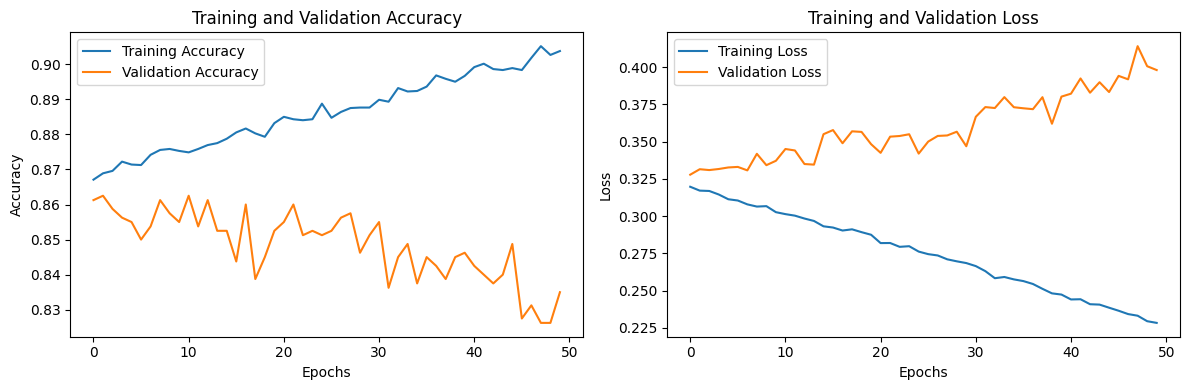

In [66]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

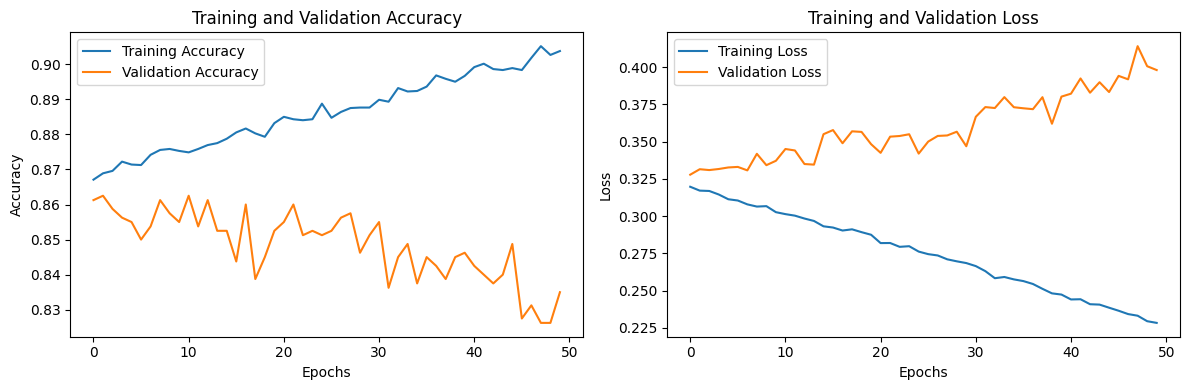

In [67]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and display classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)


63/63 [==============================] - 1s 8ms/step
Confusion Matrix:
[[1466  141]
 [ 175  218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1607
           1       0.61      0.55      0.58       393

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



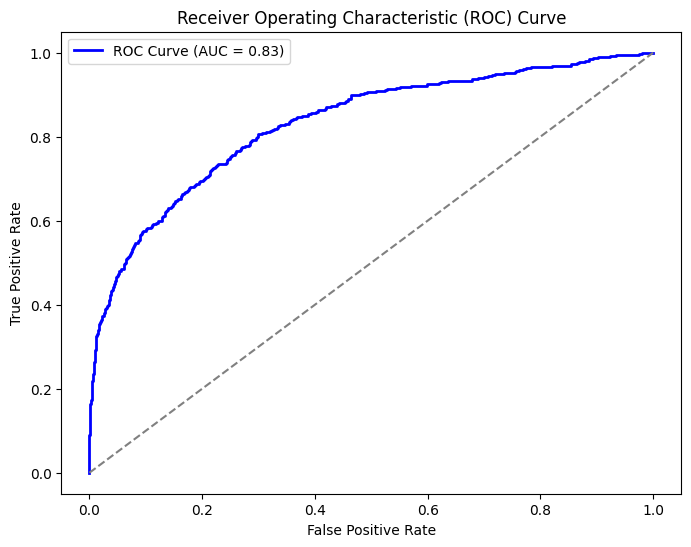

AUC Score: 0.83


In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Display AUC score
print(f'AUC Score: {auc_score:.2f}')


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming you have X_train, y_train, X_test, y_test prepared
# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Calculate class weights
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# Create a neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(class_counts), activation='softmax')  # Output layer with appropriate number of units
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, class_weight=class_weights, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 12s 33ms/step - loss: 0.5831 - accuracy: 0.6967 - val_loss: 0.4960 - val_accuracy: 0.7625
Epoch 2/10
200/200 [==============================] - 3s 17ms/step - loss: 0.5079 - accuracy: 0.7473 - val_loss: 0.4588 - val_accuracy: 0.7856
Epoch 3/10
200/200 [==============================] - 4s 18ms/step - loss: 0.4806 - accuracy: 0.7681 - val_loss: 0.5014 - val_accuracy: 0.7412
Epoch 4/10
200/200 [==============================] - 4s 18ms/step - loss: 0.4649 - accuracy: 0.7853 - val_loss: 0.4552 - val_accuracy: 0.7706
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.4575 - accuracy: 0.7859 - val_loss: 0.4676 - val_accuracy: 0.7669
Epoch 6/10
200/200 [==============================] - 4s 18ms/step - loss: 0.4520 - accuracy: 0.7952 - val_loss: 0.5125 - val_accuracy: 0.7369
Epoch 7/10
200/200 [==============================] - 3s 17ms/step - loss: 0.4465 - accuracy: 0.7937 - val_loss: 0.4237 - val_accuracy: 0.796

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

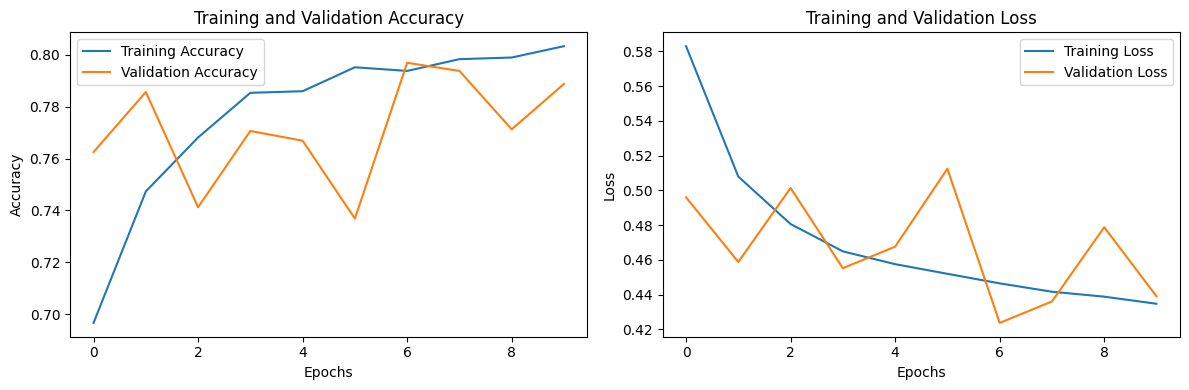

In [75]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred = np.argmax(model.predict(X_test), axis=1)

# Convert one-hot encoded labels back to original labels
y_test_original = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred)

# Generate classification report
class_report = classification_report(y_test_original, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


63/63 [==============================] - 1s 9ms/step
Confusion Matrix:
[[1285  322]
 [  97  296]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.48      0.75      0.59       393

    accuracy                           0.79      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.79      0.81      2000



63/63 [==============================] - 2s 11ms/step
AUC Score: 0.8511204954152556


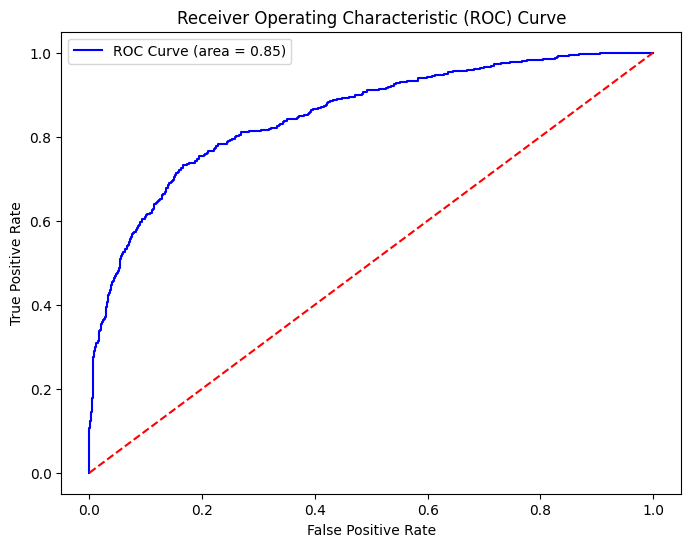

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for class 1
y_probabilities = model.predict(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_original, y_probabilities)

# Calculate AUC score
auc = roc_auc_score(y_test_original, y_probabilities)
print("AUC Score:", auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [85]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Calculate class weights
# Calculate class weights
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# Create a neural network model with increased learning rate
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights and increased learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weights)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
200/200 [==============================] - 10s 32ms/step - loss: 0.5575 - accuracy: 0.7134 - val_loss: 0.5659 - val_accuracy: 0.6988
Epoch 2/50
200/200 [==============================] - 4s 18ms/step - loss: 0.4802 - accuracy: 0.7708 - val_loss: 0.4162 - val_accuracy: 0.8112
Epoch 3/50
200/200 [==============================] - 4s 18ms/step - loss: 0.4654 - accuracy: 0.7811 - val_loss: 0.4533 - val_accuracy: 0.7906
Epoch 4/50
200/200 [==============================] - 4s 18ms/step - loss: 0.4528 - accuracy: 0.7945 - val_loss: 0.5028 - val_accuracy: 0.7525
Epoch 5/50
200/200 [==============================] - 4s 19ms/step - loss: 0.4432 - accuracy: 0.8055 - val_loss: 0.4674 - val_accuracy: 0.7719
Epoch 6/50
200/200 [==============================] - 4s 19ms/step - loss: 0.4386 - accuracy: 0.8005 - val_loss: 0.4179 - val_accuracy: 0.7931
Epoch 7/50
200/200 [==============================] - 4s 18ms/step - loss: 0.4356 - accuracy: 0.8047 - val_loss: 0.3885 - val_accuracy: 0.825

### Add Dropout Layer

In [87]:
from tensorflow.keras.layers import Dropout

# Create a neural network model with Dropout layer, class weights, and increased learning rate
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights and increased learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, class_weight=class_weights)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
225/225 [==============================] - 9s 22ms/step - loss: 0.6686 - accuracy: 0.5840 - val_loss: 0.6120 - val_accuracy: 0.7088
Epoch 2/50
225/225 [==============================] - 4s 16ms/step - loss: 0.6132 - accuracy: 0.6667 - val_loss: 0.5741 - val_accuracy: 0.7113
Epoch 3/50
225/225 [==============================] - 4s 18ms/step - loss: 0.5918 - accuracy: 0.6882 - val_loss: 0.5386 - val_accuracy: 0.7412
Epoch 4/50
225/225 [==============================] - 4s 19ms/step - loss: 0.5735 - accuracy: 0.7043 - val_loss: 0.5271 - val_accuracy: 0.7337
Epoch 5/50
225/225 [==============================] - 4s 17ms/step - loss: 0.5558 - accuracy: 0.7228 - val_loss: 0.5311 - val_accuracy: 0.7250
Epoch 6/50
225/225 [==============================] - 4s 18ms/step - loss: 0.5417 - accuracy: 0.7275 - val_loss: 0.5064 - val_accuracy: 0.7475
Epoch 7/50
225/225 [==============================] - 5s 20ms/step - loss: 0.5288 - accuracy: 0.7439 - val_loss: 0.4794 - val_accuracy: 0.7700

### Add Early Stop

#### Monitor the "val_loss" as metric

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create a neural network model with Dropout layer, class weights, and increased learning rate
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5 
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights and increased learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights and EarlyStopping callback
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1, class_weight=class_weights, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
225/225 [==============================] - 10s 26ms/step - loss: 0.6823 - accuracy: 0.6103 - val_loss: 0.6193 - val_accuracy: 0.6750
Epoch 2/50
225/225 [==============================] - 4s 16ms/step - loss: 0.6164 - accuracy: 0.6574 - val_loss: 0.5579 - val_accuracy: 0.7138
Epoch 3/50
225/225 [==============================] - 3s 15ms/step - loss: 0.5923 - accuracy: 0.6818 - val_loss: 0.5236 - val_accuracy: 0.7500
Epoch 4/50
225/225 [==============================] - 4s 16ms/step - loss: 0.5689 - accuracy: 0.7107 - val_loss: 0.5204 - val_accuracy: 0.7575
Epoch 5/50
225/225 [==============================] - 4s 18ms/step - loss: 0.5527 - accuracy: 0.7274 - val_loss: 0.5027 - val_accuracy: 0.7700
Epoch 6/50
225/225 [==============================] - 4s 19ms/step - loss: 0.5416 - accuracy: 0.7407 - val_loss: 0.5184 - val_accuracy: 0.7500
Epoch 7/50
225/225 [==============================] - 4s 16ms/step - loss: 0.5260 - accuracy: 0.7532 - val_loss: 0.4881 - val_accuracy: 0.781

#### Monitor the "val_recall" as metric

In [96]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import recall_score


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

class EarlyStoppingWithRecall(Callback):
    def __init__(self, validation_data, patience=10):
        super(EarlyStoppingWithRecall, self).__init__()
        self.validation_data = validation_data
        self.patience = patience
        self.best_recall = 0
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred_prob = self.model.predict(X_val)
        y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities to get binary predictions
        val_recall = recall_score(y_val, y_pred)
        
        if val_recall > self.best_recall:
            self.best_recall = val_recall
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print(f'\nEarly stopping due to no improvement in recall for {self.patience} epochs.')
                self.model.stop_training = True


# Create EarlyStoppingWithRecall callback
early_stopping_recall = EarlyStoppingWithRecall(validation_data=(X_val, y_val), patience=10)

# Create a neural network model with Dropout layer, class weights, and increased learning rate
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights and increased learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights, EarlyStopping with recall, and monitor 'val_recall'
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights, callbacks=[early_stopping_recall], verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
250/250 [==============================] - 11s 31ms/step - loss: 0.6711 - accuracy: 0.5946 - val_loss: 0.5942 - val_accuracy: 0.7065
Epoch 2/50
250/250 [==============================] - 6s 22ms/step - loss: 0.6112 - accuracy: 0.6593 - val_loss: 0.5577 - val_accuracy: 0.7435
Epoch 3/50
250/250 [==============================] - 5s 22ms/step - loss: 0.5915 - accuracy: 0.6859 - val_loss: 0.5721 - val_accuracy: 0.7205
Epoch 4/50
250/250 [==============================] - 6s 24ms/step - loss: 0.5756 - accuracy: 0.7034 - val_loss: 0.5456 - val_accuracy: 0.7590
Epoch 5/50
250/250 [==============================] - 6s 22ms/step - loss: 0.5586 - accuracy: 0.7228 - val_loss: 0.5285 - val_accuracy: 0.7555
Epoch 6/50
250/250 [==============================] - 6s 23ms/step - loss: 0.5389 - accuracy: 0.7387 - val_loss: 0.4994 - val_accuracy: 0.7625
Epoch 7/50
250/250 [==============================] - 7s 28ms/step - loss: 0.5291 - accuracy: 0.7500 - val_loss: 0.4984 - val_accuracy: 0.761

## GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the model creation function with parameters for GridSearchCV
def create_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dropout(dropout_rate),
        Dense(8, activation='relu'),
        Dropout(dropout_rate),
        Dense(4, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.3, 0.5]
}

# Create GridSearchCV instance with the model, parameter grid, and custom callback
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the GridSearchCV
grid_result = grid.fit(X_train, y_train, callbacks=[EarlyStoppingWithRecall(validation_data=(X_val, y_val), patience=10)])

# Print the best parameters and results
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)


C:\Users\amb\AppData\Local\Temp\ipykernel_6100\2552103624.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


63/63 [==============================] - 2s 9ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 2s 9ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 3s 10ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 3s 14ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 2s 10ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 2s 10ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 3s 12ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 3s 13ms/step

Early stopping due to no improvement in recall for 10 epochs.
63/63 [==============================] - 3s 10ms/step

Early stopp

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

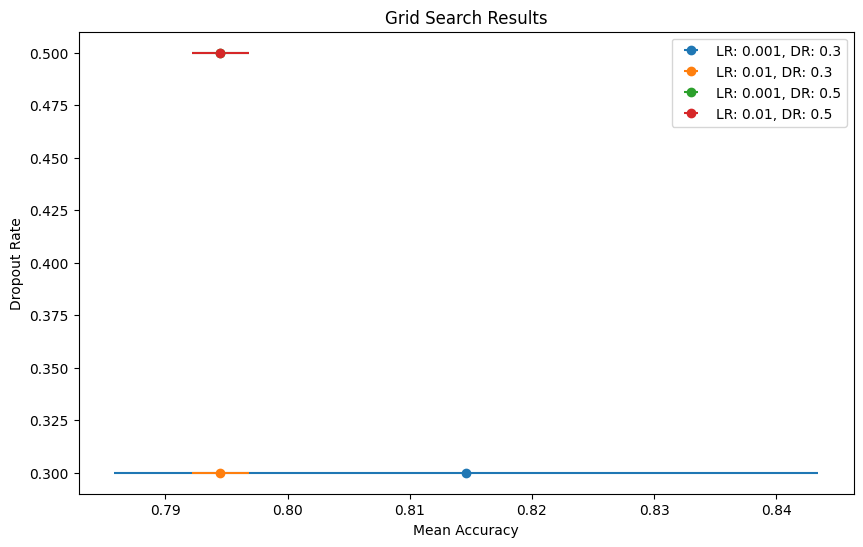

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting results from grid search
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

# Extracting parameter values for learning_rate and dropout_rate
learning_rates = [param['learning_rate'] for param in params]
dropout_rates = [param['dropout_rate'] for param in params]

# Plotting the results
plt.figure(figsize=(10, 6))
for mean, std, learning_rate, dropout_rate in zip(means, stds, learning_rates, dropout_rates):
    label = f'LR: {learning_rate}, DR: {dropout_rate}'
    plt.errorbar(mean, dropout_rate, xerr=std, fmt='o', label=label)

plt.xlabel('Mean Accuracy')
plt.ylabel('Dropout Rate')
plt.title('Grid Search Results')
plt.legend()
plt.show()


In [101]:
from sklearn.metrics import confusion_matrix, classification_report

# Extract the best model from GridSearchCV results
best_model = grid_result.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_val)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred_binary)
print("Classification Report:")
print(class_report)


63/63 [==============================] - 1s 10ms/step
Confusion Matrix:
[[1607    0]
 [ 393    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\amb\anaconda5\envs\newenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amb\anaconda5\envs\newenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amb\anaconda5\envs\newenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 1s 10ms/step
AUC Score: 0.7655660429640678


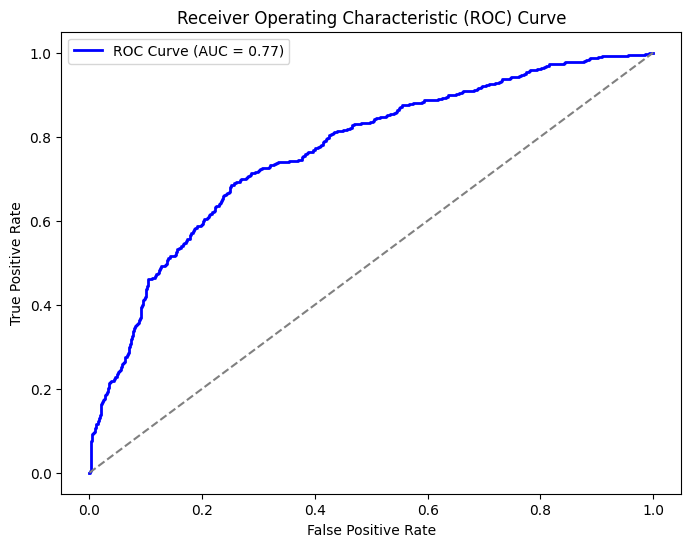

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_val)
y_prob_positive = y_prob[:, 1]  # Probability of positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob_positive)

# Compute AUC score
auc_score = roc_auc_score(y_val, y_prob_positive)
print("AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Final Model and Model Deployment

In [106]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming you have X_train, y_train, X_test, y_test prepared
# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Calculate class weights
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# Create a neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(len(class_counts), activation='softmax')  # Output layer with appropriate number of units
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, class_weight=class_weights, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 11s 32ms/step - loss: 0.6007 - accuracy: 0.6480 - val_loss: 0.5836 - val_accuracy: 0.7138
Epoch 2/50
200/200 [==============================] - 4s 20ms/step - loss: 0.5062 - accuracy: 0.7517 - val_loss: 0.4964 - val_accuracy: 0.7569
Epoch 3/50
200/200 [==============================] - 4s 21ms/step - loss: 0.4766 - accuracy: 0.7750 - val_loss: 0.4969 - val_accuracy: 0.7538
Epoch 4/50
200/200 [==============================] - 4s 20ms/step - loss: 0.4608 - accuracy: 0.7953 - val_loss: 0.4336 - val_accuracy: 0.8081
Epoch 5/50
200/200 [==============================] - 4s 20ms/step - loss: 0.4521 - accuracy: 0.7962 - val_loss: 0.4333 - val_accuracy: 0.8037
Epoch 6/50
200/200 [==============================] - 4s 21ms/step - loss: 0.4461 - accuracy: 0.8037 - val_loss: 0.4641 - val_accuracy: 0.7788
Epoch 7/50
200/200 [==============================] - 4s 20ms/step - loss: 0.4415 - accuracy: 0.8036 - val_loss: 0.4508 - val_accuracy: 0.788

## Prediction

In [108]:

# Predict using X_test
y_pred_probabilities = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_pred_classes


63/63 [==============================] - 1s 9ms/step


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

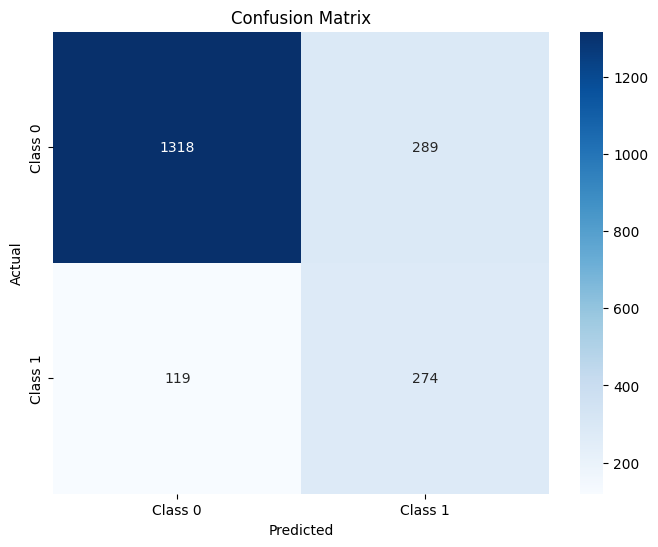

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_classes are defined as explained in the previous response
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=["Class {}".format(i) for i in range(conf_matrix.shape[1])],
            yticklabels=["Class {}".format(i) for i in range(conf_matrix.shape[0])])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___